In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [40]:
# Loading dataset
df = pd.read_csv('/content/Fashion Data/fastFashionCompDim.csv')

# first few rows
print(df.head())

# Columns
print(df.columns)

   item_code                item_name part_name          material  \
0     200000           CAMISA POPELÍN  EXTERIOR           algodon   
1     200001           CAMISA POPELÍN  EXTERIOR           algodon   
2     200002    BLUSA HILO METALIZADO  EXTERIOR           viscosa   
3     200002  BLUSA SATINADA ALAMARES  EXTERIOR  fibra metalizada   
4     200002  BLUSA ESTAMPADA CROPPED  EXTERIOR          elastano   

  Eco-Friendly percent  item_price   
0         True    100%   $1,995.00   
1         True    100%   $1,995.00   
2        False     62%   $3,995.00   
3        False     37%   $2,995.00   
4        False      1%   $1,995.00   
Index(['item_code', 'item_name', 'part_name', 'material', 'Eco-Friendly',
       'percent', ' item_price '],
      dtype='object')


In [27]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Standardize text data to lowercase
df['material'] = df['material'].str.lower()
df['part_name'] = df['part_name'].str.upper()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Display cleaned data info
print(df.info())


item_code         0
item_name       181
part_name         0
material          0
percent           0
 item_price     181
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 275
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   item_code     276 non-null    int64 
 1   item_name     276 non-null    object
 2   part_name     276 non-null    object
 3   material      276 non-null    object
 4   percent       276 non-null    object
 5    item_price   276 non-null    object
dtypes: int64(1), object(5)
memory usage: 15.1+ KB
None


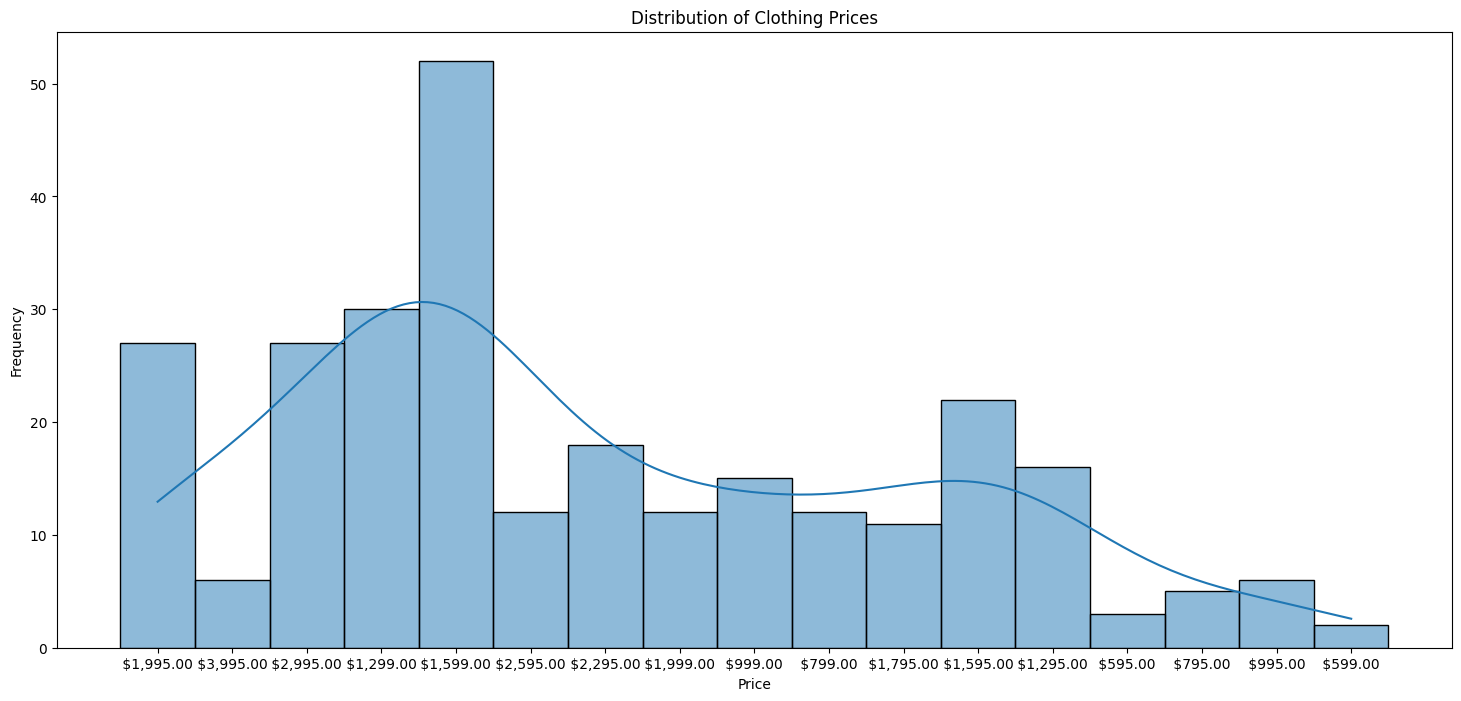

In [37]:
#Distribution of Clothing Prices
plt.figure(figsize=(18, 8))
sns.histplot(df[' item_price '], bins=30, kde=True)
plt.title('Distribution of Clothing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


<ipython-input-39-466439c6e428>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_materials.values, y=top_materials.index, palette='viridis')


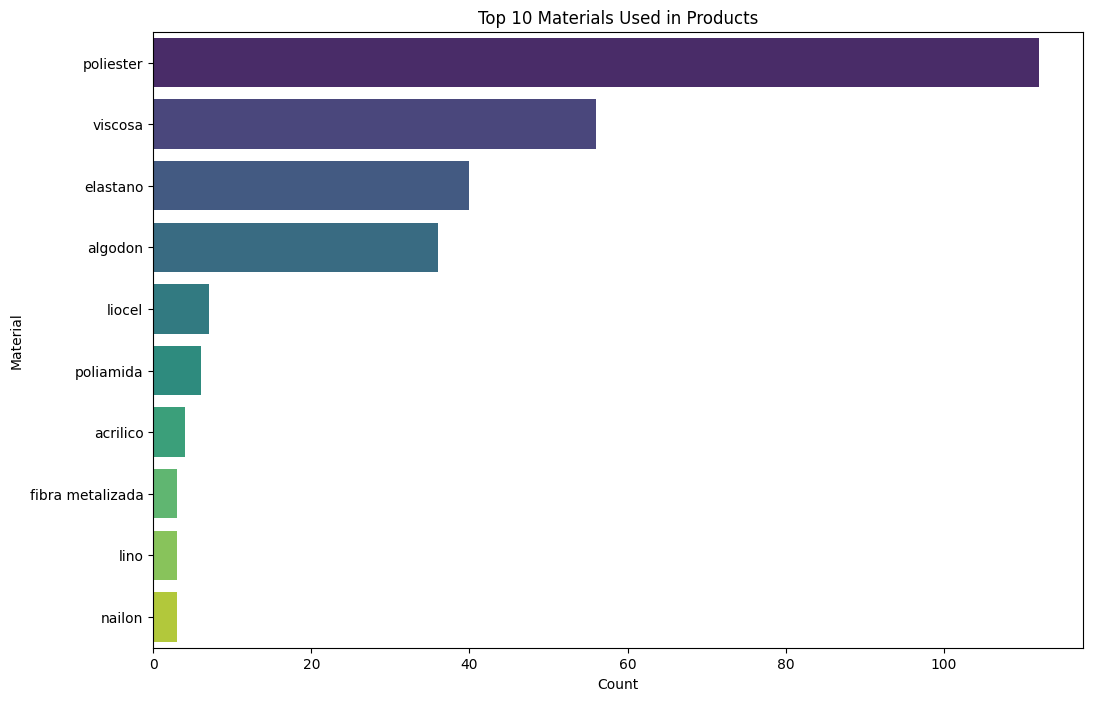

In [39]:
#Top 10 Materials Used in Products
plt.figure(figsize=(12, 8))
top_materials = df['material'].value_counts().head(10)
sns.barplot(x=top_materials.values, y=top_materials.index, palette='viridis')
plt.title('Top 10 Materials Used in Products')
plt.xlabel('Count')
plt.ylabel('Material')
plt.show()


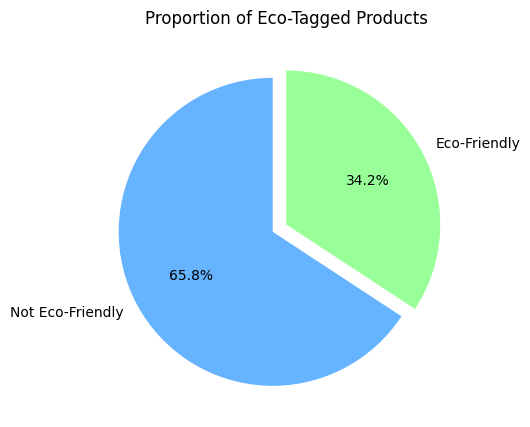

In [58]:
#Proportion of Eco-Tagged Products
eco_counts = df['Eco-Friendly'].value_counts()
Class=['Not Eco-Friendly','Eco-Friendly']
fig=plt.figure(figsize=(6, 5))
plt.pie(eco_counts, labels=Class, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'],explode=(0.1,0))
plt.title('Proportion of Eco-Tagged Products')
plt.show()


<ipython-input-68-e2d89c18b73d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Eco-Friendly'], y=df[' item_price '], palette="Set2")


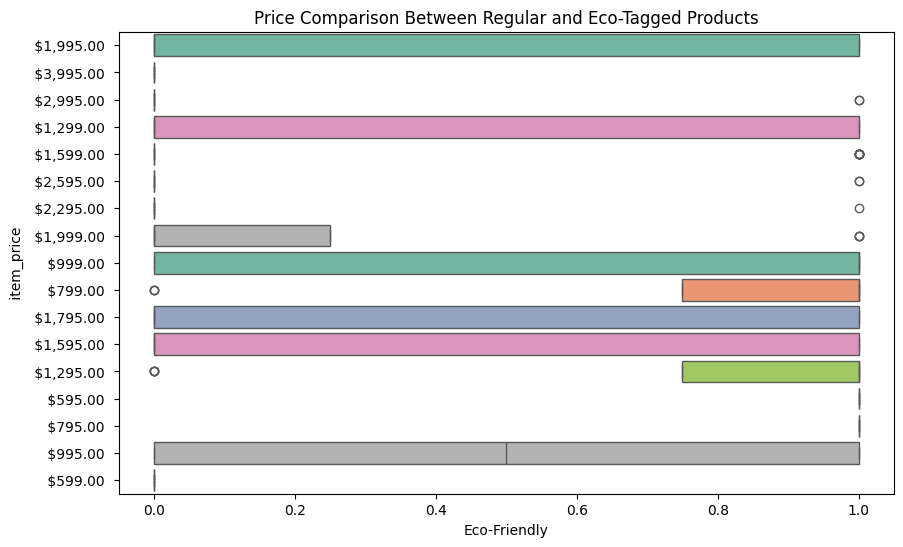

In [68]:
# Price vs. Sustainability
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Eco-Friendly'], y=df[' item_price '], palette="Set2")
plt.title('Price Comparison Between Regular and Eco-Tagged Products')
plt.xlabel('Eco-Friendly')
plt.ylabel(' item_price ')
plt.show()


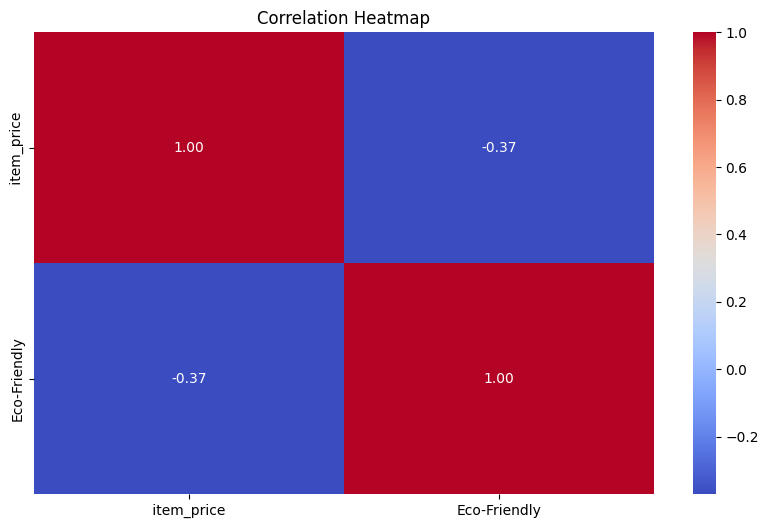

In [72]:
df[' item_price '] = df[' item_price '].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
plt.figure(figsize=(10,6))
corr = df[[' item_price ', 'Eco-Friendly']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Encoding categorical variables
le = LabelEncoder()
df['Eco-Friendly'] = le.fit_transform(df['Eco-Friendly'])  # 0 = Not Eco, 1 = Eco
df['material'] = le.fit_transform(df['material'])  # Convert text to numbers

# Splitting dataset
X = df[['material', ' item_price ']]
y = df['Eco-Friendly']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 2. Remove rows with NaN values
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Update y_train to match the dropped rows
X_test.dropna(inplace=True)
y_test = y_test[X_test.index]

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.76      0.65      0.70        20
           2       0.00      0.00      0.00         1

    accuracy                           0.78        54
   macro avg       0.52      0.51      0.51        54
weighted avg       0.76      0.78      0.77        54



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
